##### IMPORT

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# MEMORY CHECKUP
import resource
def mem_check():
    print("{} Kb".format(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss))

### A. VARIABLES

In [3]:
# BASIC COMPUTATION 1: SCALAR
x = tf.constant(35, name='x')
y = tf.Variable(x+5, name='y')
    # computational grpha
model = tf.global_variables_initializer()
    # instance object
with tf.Session() as session:
    session.run(model)
    print session.run(y)

40


In [5]:
# BASIC COMPUTATION 2: VECTOR
x = tf.constant([35, 40, 45], name='x')
y = tf.Variable(x+5, name='y')
model = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(model)
    print(session.run(y))

[40 45 50]


In [2]:
# BASIC COMPUTATION 3: WITH NUMPY
x = tf.constant(np.random.randint(10,size=10), name='x')
y = tf.Variable(5*(x**2)-3*x+15, name='y')
model = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(model)
    print session.run(y)

[ 83  15  15 311 311 311  17  83 177  15]


In [4]:
# BASIC COMPUTATION 4: VALUE UPDATE
x = tf.Variable(0, name='x')
model = tf.global_variables_initializer()
with tf.Session() as session:
    for i in range(5):
        session.run(model)
        x = x + 1
        print(session.run(x))

1
2
3
4
5


### B. ARRAYS

In [2]:
image = mpimg.imread("/Users/jacobsw/Desktop/CODER/TENSORFLOW/FIGS/MarshOrchid.jpg")

In [5]:
print image.shape

(5528, 3685, 3)


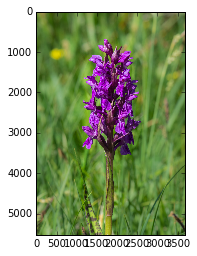

In [6]:
plt.imshow(image)
plt.show()

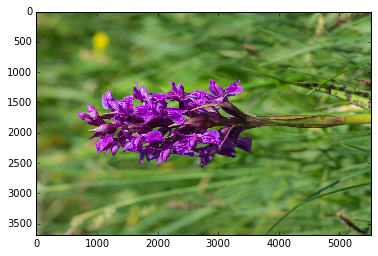

In [7]:
# TRANSPOSE (NOT REALLY ROTATION COUNTER CLOCKWISE)
x = tf.Variable(image, name='x')
model = tf.global_variables_initializer()
with tf.Session() as session:
    x = tf.transpose(x, perm=[1, 0, 2]) # dimensions from [0,1,2] -> [1,0,2].
    session.run(model)
    result = session.run(x)
plt.imshow(result)
plt.show()

(5528, 3685, 3)


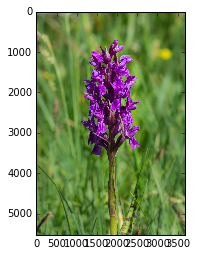

In [8]:
# FLIP (LEFT -> RIGHT)
height, width, depth = image.shape
x = tf.Variable(image, name='x')
model = tf.global_variables_initializer()
with tf.Session() as session:
    x = tf.reverse_sequence(x, [width]*height, 1, batch_dim=0)
        # [width]*height: [3685]*5528 (for each row, there are 3685 elements).
        # seq_dim=1: top down.
        # batch_dim=0: do so along dimension 0 (x-axis).
    session.run(model)
    result = session.run(x)
print result.shape
plt.imshow(result)
plt.show()

(5528, 3685, 3)


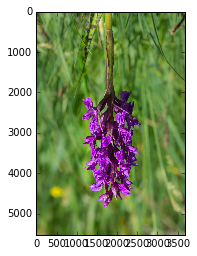

In [10]:
# FLIP (UP -> DOWN)
height, width, depth = image.shape
x = tf.Variable(image, name='x')
model = tf.global_variables_initializer()
with tf.Session() as session:
    x = tf.reverse_sequence(x, width*[height], 0, batch_dim=1)
        # [width]*height: 3685*[5528] (for each col, there are 5528 elements).
        # seq_dim=1: left to right.
        # batch_dim=0: do so along dimension 1 (y-axis).
    session.run(model)
    result = session.run(x)
print result.shape
plt.imshow(result)
plt.show()

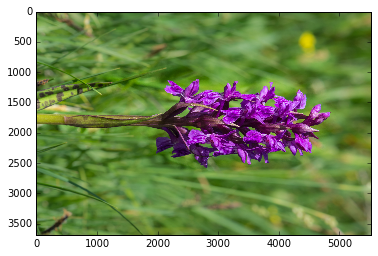

In [4]:
# ROTATION (CLOCKWISE)
height, width, depth = image.shape
x = tf.Variable(image, name='x')
model = tf.global_variables_initializer()
with tf.Session() as session:
    x = tf.reverse_sequence(x, width*[height], 0, batch_dim=1) # FLIP UP-DOWN
    x = tf.transpose(x, perm=[1, 0, 2]) # TRANSPOSE
    session.run(model)
    result = session.run(x)
plt.imshow(result)
plt.show()

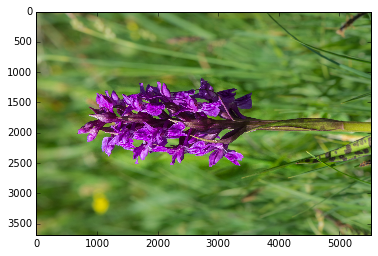

In [5]:
# ROTATION (CLOCKWISE)
height, width, depth = image.shape
x = tf.Variable(image, name='x')
model = tf.global_variables_initializer()
with tf.Session() as session:
    x = tf.reverse_sequence(x, [width]*height, 1, batch_dim=0) # FLIP LEFT-RIGHT
    x = tf.transpose(x, perm=[1, 0, 2]) # TRANSPOSE
    session.run(model)
    result = session.run(x)
plt.imshow(result)
plt.show()

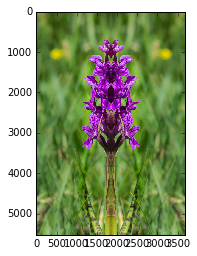

In [36]:
# MIRROR (RIGHT MIRRORING LEFT)
left_half = image[:,:image.shape[1]/2,:]
    # alternative: tf.slice(x, [0,0,0], [-1, width/2, -1]) later in with tf.Session() scope.
height, width, depth = left_half.shape
x = tf.Variable(left_half, name='x')
model = tf.global_variables_initializer()
with tf.Session() as session:
    x = tf.reverse_sequence(x, [width]*height, 1, batch_dim=0) # FLIP LEFT-RIGHT
    session.run(model)
    result = session.run(x)
result = np.hstack((left_half,result))
plt.imshow(result)
plt.show()

### C. PLACEHOLDER

In [6]:
x = tf.placeholder('float', 3) # tf.placeholder(dtype, shape=None, name=None)
    # dim specified at 3.
y = x * 2
with tf.Session() as session:
    result = session.run(y, feed_dict={x:[1,2,3]})
print result

[ 2.  4.  6.]


In [7]:
x = tf.placeholder('float', [None, 3]) 
    # dim specified as ANY_NUMBER of rows, 3 cols.
y = x * 2
with tf.Session() as session:
    result = session.run(y, feed_dict={x:[[1,2,3],[4,5,6]]})
print result

[[  2.   4.   6.]
 [  8.  10.  12.]]


(3000, 3685, 3)


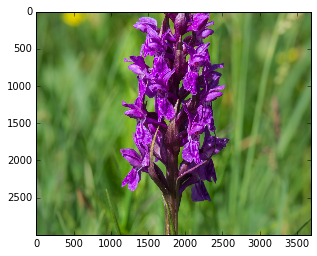

In [4]:
# CROPPING IMAGE
image = mpimg.imread("/Users/jacobsw/Desktop/CODER/TENSORFLOW/FIGS/MarshOrchid.jpg")
x = tf.placeholder('uint8', [None, None, 3])
y = tf.slice(image, [1000,0,0], [3000,-1,-1]) # tf.slice(input_, begin, size, name=None). -1 means ALL.
with tf.Session() as session:
    result = session.run(y, feed_dict={x: image})
    print result.shape
plt.imshow(result)
plt.show()

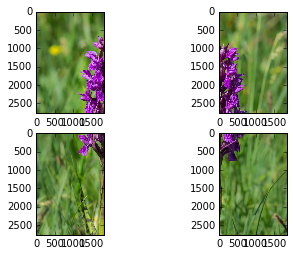

In [16]:
# BREAK IMAGE INTO 4 CORNERS
height, width, depth = image.shape
top_left = tf.slice(image, [0, 0, 0], [height/2, width/2, -1])
top_right = tf.slice(image, [0, width/2, 0], [height/2, -1, -1])
bottom_left = tf.slice(image, [height/2, 0, 0], [-1, width/2, -1])
bottom_right = tf.slice(image, [height/2, width/2, 0], [-1, -1, -1])
with tf.Session() as session:
    ret_topleft = session.run(top_left)
    ret_topright = session.run(top_right)
    ret_bottomleft = session.run(bottom_left)
    ret_bottomright = session.run(bottom_right)
plt.subplots()
plt.subplot(221); plt.imshow(ret_topleft)
plt.subplot(222); plt.imshow(ret_topright)
plt.subplot(223); plt.imshow(ret_bottomleft)
plt.subplot(224); plt.imshow(ret_bottomright)
plt.show()

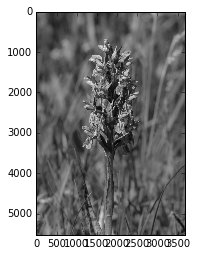

In [10]:
# SHOW IMAGE IN GRAYSCALE
x = tf.placeholder('float32', [None, None, 3])
image_gray = tf.reduce_mean(x, 2) # averaging over the last dimension.
with tf.Session() as session:
    result = session.run(image_gray, feed_dict={x:image})
plt.imshow(result, cmap='gray')
plt.show()

### D. INTERACTIVE SESSIONS

In [11]:
session = tf.InteractiveSession()
x = tf.constant(range(10))
print x.eval() # in interactive mode, this shortcut is available (no need to run session.run()).
session.close()

[0 1 2 3 4 5 6 7 8 9]


### E. TENSORBOARD VISUALS

TensorDebugger: https://github.com/ericjang/tdb

In [7]:
# AN EXAMPLE GRAPH
a = tf.add(1, 2,)
b = tf.mul(a, 3)
c = tf.add(4, 5,)
d = tf.mul(c, 6,)
e = tf.mul(4, 5,)
f = tf.div(c, 6,)
g = tf.add(b, d)
h = tf.mul(g, f)
    # these can be named tf.op(..., name='...') to make the graph more readable.

with tf.Session() as sess: 
    writer = tf.summary.FileWriter('tensorboard_file', sess.graph)
        # save file for reading later.
    print(sess.run(h))
    writer.close()

63


In [2]:
# DEFINE SCOPE
#
# plates will be created to group nodes.
with tf.name_scope("MyOperationGroup"):
    with tf.name_scope("Scope_A"):
        a = tf.add(1, 2, name="Add_these_numbers")
        b = tf.mul(a, 3)
    with tf.name_scope("Scope_B"):
        c = tf.add(4, 5, name="And_These_ones")
        d = tf.mul(c, 6, name="Multiply_these_numbers")

with tf.name_scope("Scope_C"):
    e = tf.mul(4, 5, name="B_add")
    f = tf.div(c, 6, name="B_mul")
g = tf.add(b, d)
h = tf.mul(g, f)

with tf.Session() as sess: 
    writer = tf.summary.FileWriter('tensorboard_file', sess.graph)
        # save file for reading later.
    print(sess.run(h))
    writer.close()

63


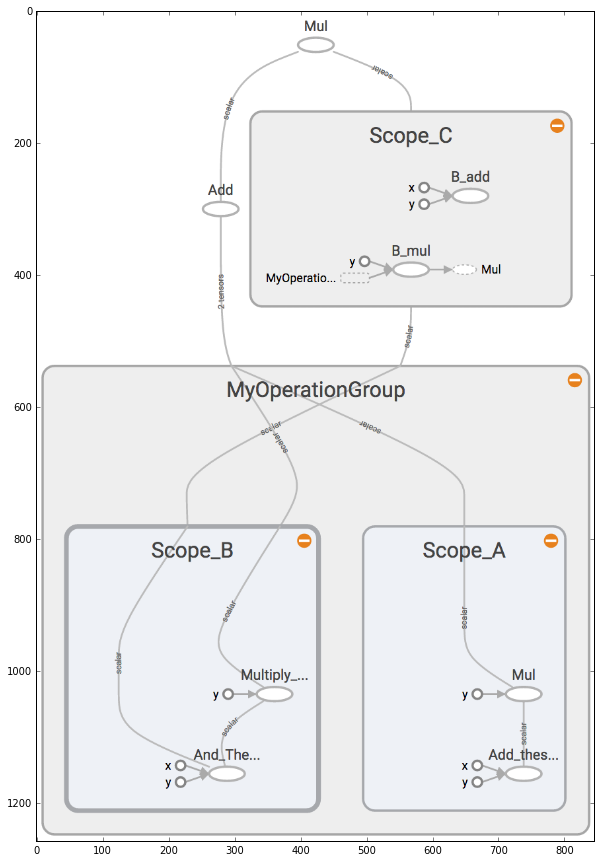

In [5]:
graph = mpimg.imread("/Users/jacobsw/Desktop/CODER/TENSORFLOW/FIGS/tensorboard_graph.png")
plt.figure(figsize=(10,20))
plt.imshow(graph)
plt.show()

### F. FILE I/O

In [9]:
# PREVIEW FILE TO BE READ
df = pd.read_csv("/Users/jacobsw/Desktop/CODER/TENSORFLOW/DATA/olympics2016.csv")
df.head()

,NOC,Country Code,Gold,Silver,Bronze,Total
0,United States,USA,46,37,38,121
1,Great Britain,GBR,27,23,17,67
2,China,CHN,26,18,26,70
3,Russia,RUS,19,18,19,56
4,Germany,GER,17,10,15,42


In [10]:
features = tf.placeholder(tf.int32, shape=[3], name='features')
country = tf.placeholder(tf.string, name='country')
total = tf.reduce_sum(features, name='total') # tally medals.
printerop = tf.Print(total, [country, features, total], name='printer') 
    # print contents.
    # it takes [country, features, total] as input, and returns total.

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    with open("/Users/jacobsw/Desktop/CODER/TENSORFLOW/DATA/olympics2016.csv") as inf:
        next(inf) # skip the header line
        for line in inf:
            country_name, code, gold, silver, bronze, total = line.strip().split(',')
            gold = int(gold); silver = int(silver); bronze = int(bronze)
            total = sess.run(printerop, feed_dict={features:[gold,silver,bronze],
                                                   country:country_name}) 
                                                        # country named is not necessary for computation,
                                                        # but it must be present as a part of the computational graph.
                                                        # total depends on country too.
            print country_name, total

"United States" 121
"Great Britain" 67
"China" 70
"Russia" 56
"Germany" 42
"Japan" 41
"France" 42
"South Korea" 21
"Italy" 28
"Australia" 29
"Netherlands" 19
"Hungary" 15
"Brazil" 19
"Spain" 17
"Kenya" 13
"Jamaica" 11
"Croatia" 10
"Cuba" 11
"New Zealand" 18
"Canada" 22
"Uzbekistan" 13
"Kazakhstan" 17
"Colombia" 8
"Switzerland" 7
"Iran" 8
"Greece" 6
"Argentina" 4
"Denmark" 15
"Sweden" 11
"South Africa" 10
"Ukraine" 11
"Serbia" 8
"Poland" 11
"North Korea" 7
"Belgium" 6
"Thailand" 6
"Slovakia" 4
"Georgia" 7
"Azerbaijan" 18
"Belarus" 9
"Turkey" 8
"Armenia" 4
"Czech Republic" 10
"Ethiopia" 8
"Slovenia" 4
"Indonesia" 3
"Romania" 5
"Bahrain" 2
"Vietnam" 2
"Chinese Taipei" 3
"Bahamas" 2
"Ivory Coast" 2
"Independent Olympic Athletes" 2
"Fiji" 1
"Jordan" 1
"Kosovo" 1
"Puerto Rico" 1
"Singapore" 1
"Tajikistan" 1
"Malaysia" 5
"Mexico" 5
"Algeria" 2
"Ireland" 2
"Lithuania" 4
"Bulgaria" 3
"Venezuela" 3
"India" 2
"Mongolia" 2
"Burundi" 1
"Grenada" 1
"Niger" 1
"Philippines" 1
"Qatar" 1
"Norway" 4
"Egy